In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [26]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom,G/lambda_trts
0,0:00:54,100,500000,0.006953,0.016775,0.009579,0.001650,0.013967,0.009182,0.420646,...,0.624544,0.539680,39.534389,0.407501,0.352652,4.074788,0.022886,1.0,0.1,0.0
1,0:01:25,200,500000,0.032187,0.008816,0.026415,0.003376,0.029065,0.014113,0.524947,...,0.492468,0.566437,32.653194,0.221630,0.193717,2.370711,0.014085,1.0,0.1,0.0
2,0:01:57,300,500000,0.055860,0.008483,0.043729,0.001931,0.033051,0.021190,0.382176,...,0.436579,0.500613,19.771839,0.182842,0.159851,0.850072,0.006494,1.0,0.1,0.0
3,0:02:30,400,500000,0.114332,0.009206,0.040903,0.004327,0.118354,0.018808,0.513119,...,0.413306,0.509259,26.381826,0.147544,0.119855,0.738819,0.009704,1.0,0.1,0.0
4,0:03:03,500,500000,0.010509,0.004404,0.040317,0.000162,0.082501,0.028215,0.720082,...,0.389048,0.562087,20.320463,0.140240,0.114916,0.880095,0.005546,1.0,0.1,0.0


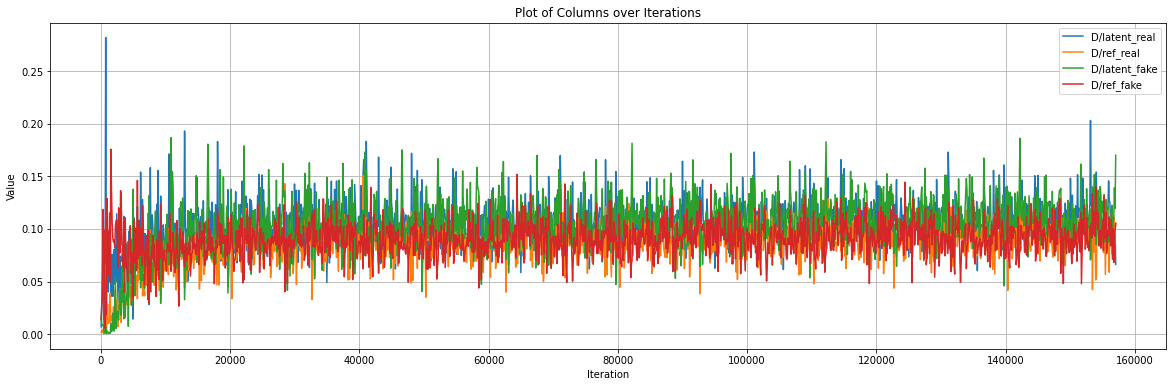

In [28]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

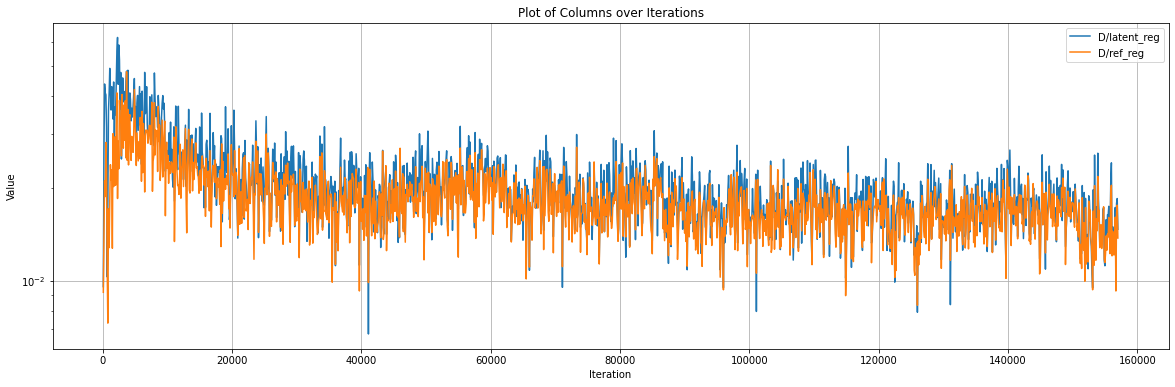

In [29]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

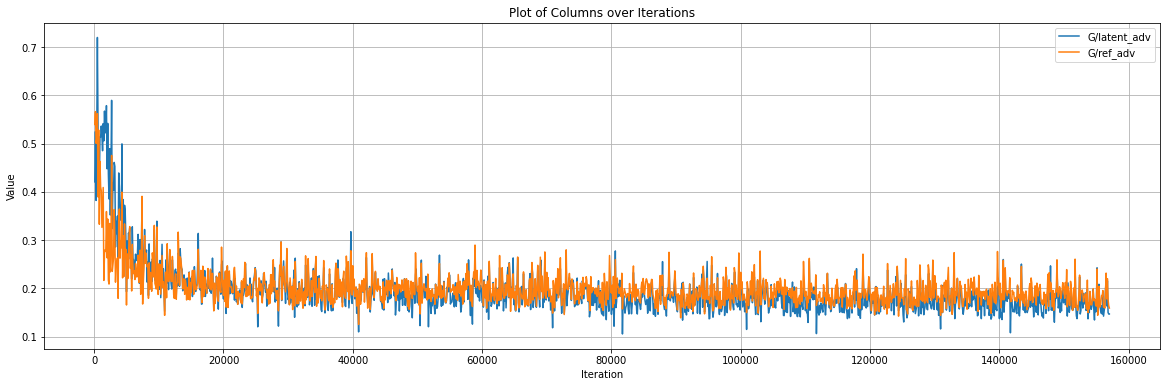

In [30]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

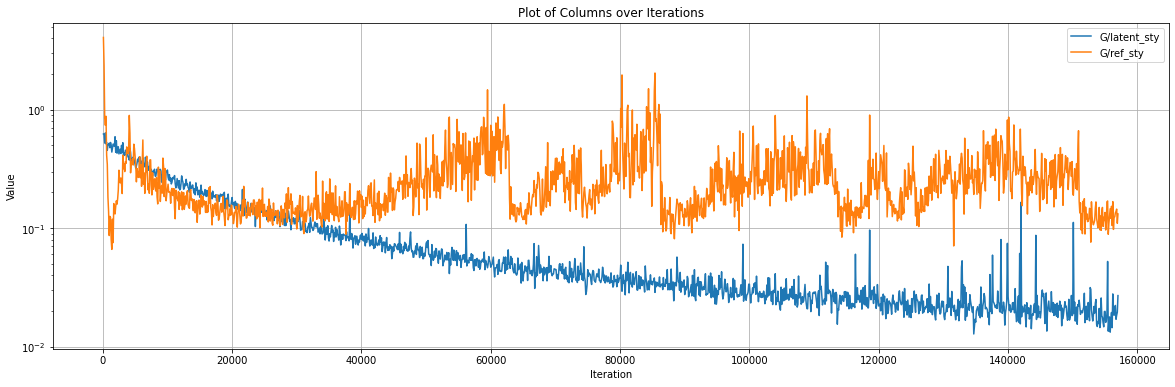

In [31]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

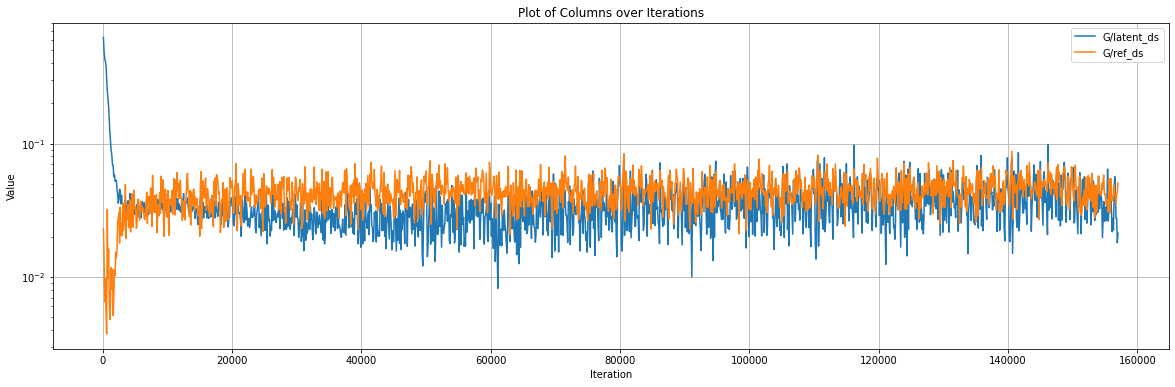

In [32]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

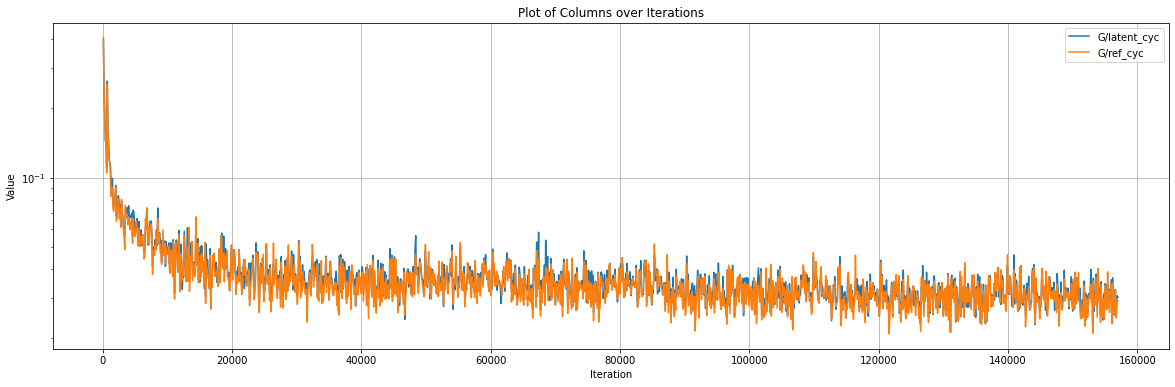

In [33]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

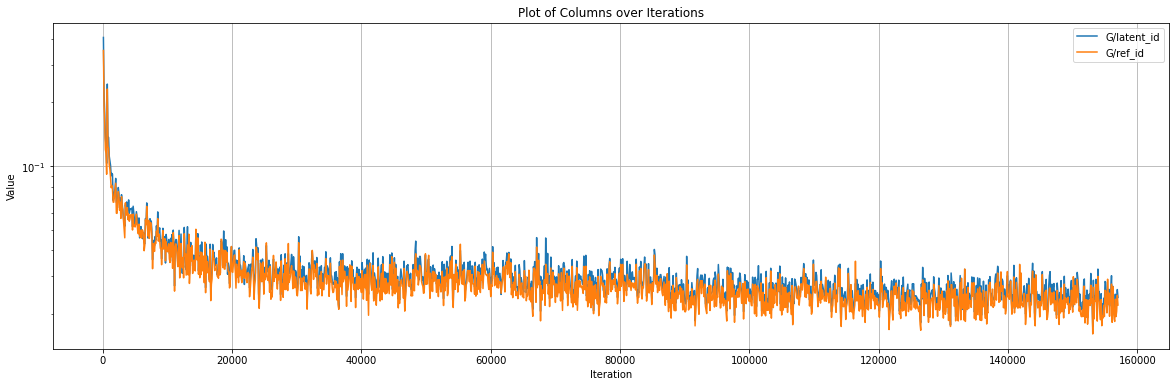

In [34]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

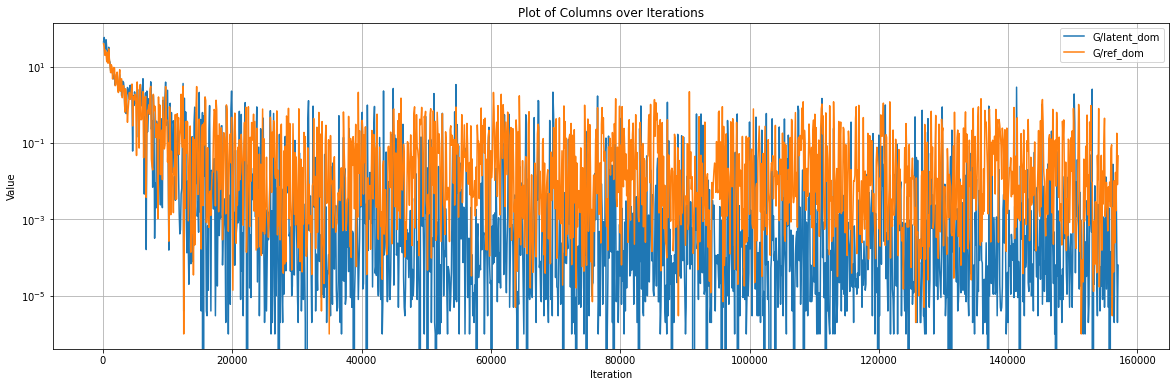

In [35]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

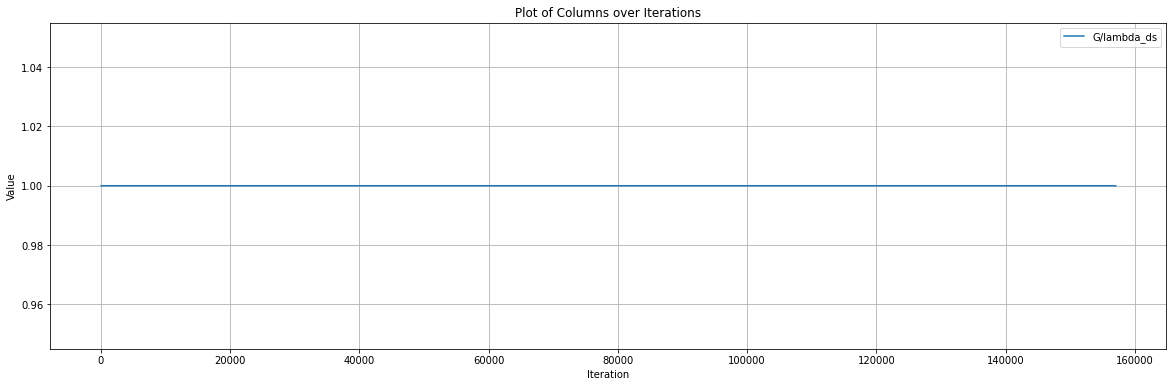

In [36]:
plot_columns(history, ['G/lambda_ds'])

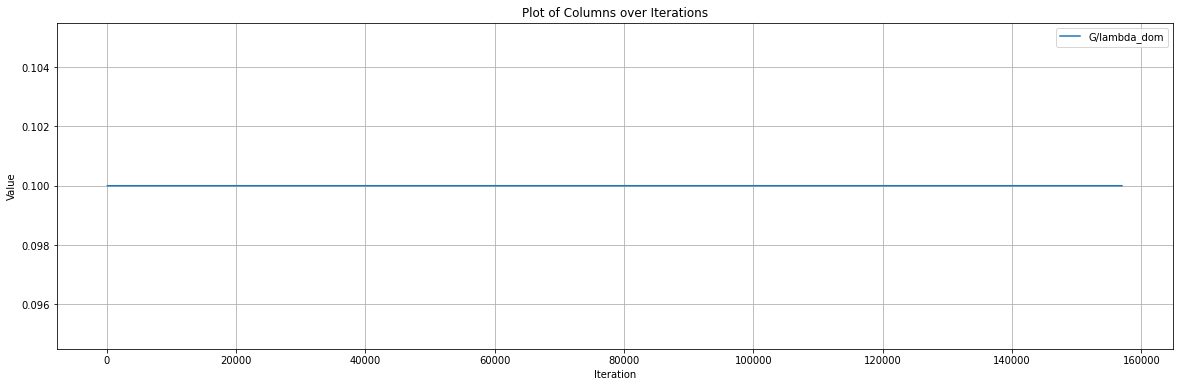

In [37]:
plot_columns(history, ['G/lambda_dom'])

# Metrics

## TSTR Score

In [38]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,domain,accuracy,loss
0,10000,latent,WAL,10,0.915033,0.316481
1,10000,latent,WAL,11,0.953528,0.152913
2,10000,latent,WAL,12,0.889081,0.438729
3,10000,latent,WAL,13,0.978056,0.109866
4,10000,latent,WAL,14,0.881239,0.530992


Maximum accuracy for CLD in latent mode: 0.8709 at step 140000
Maximum accuracy for CLU in latent mode: 0.9101 at step 100000
Maximum accuracy for RUN in latent mode: 0.7909 at step 100000
Maximum accuracy for WAL in latent mode: 0.9234 at step 10000


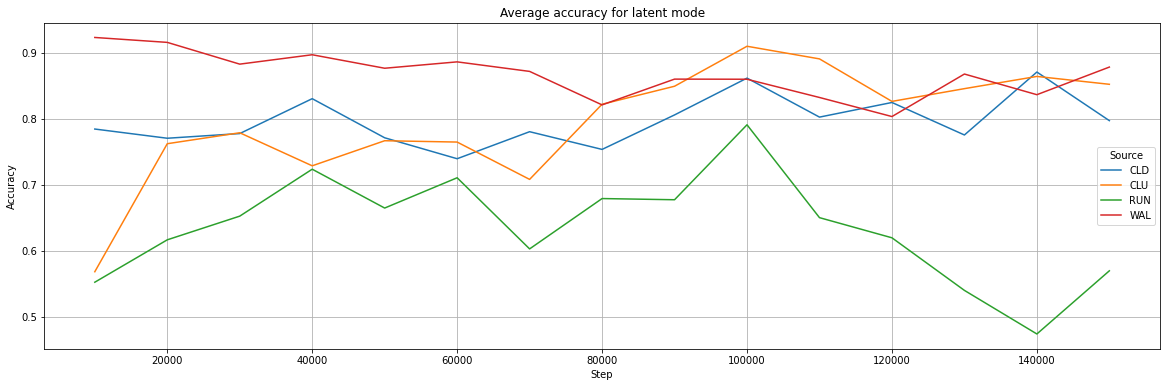

Maximum accuracy for CLD in reference mode: 0.9065 at step 110000
Maximum accuracy for CLU in reference mode: 0.9505 at step 120000
Maximum accuracy for RUN in reference mode: 0.7654 at step 100000
Maximum accuracy for WAL in reference mode: 0.9565 at step 130000


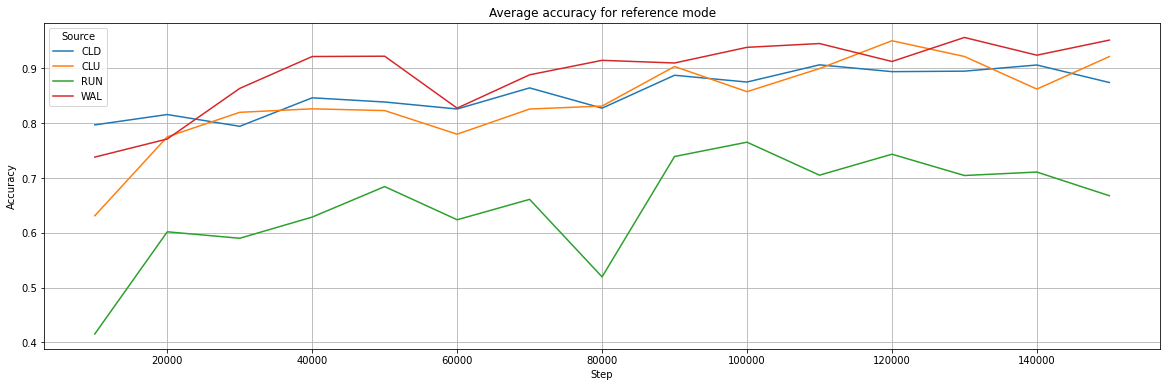

Minimum loss for CLD in latent mode: 0.5382 at step 140000
Minimum loss for CLU in latent mode: 0.3585 at step 100000
Minimum loss for RUN in latent mode: 0.8315 at step 100000
Minimum loss for WAL in latent mode: 0.3098 at step 10000


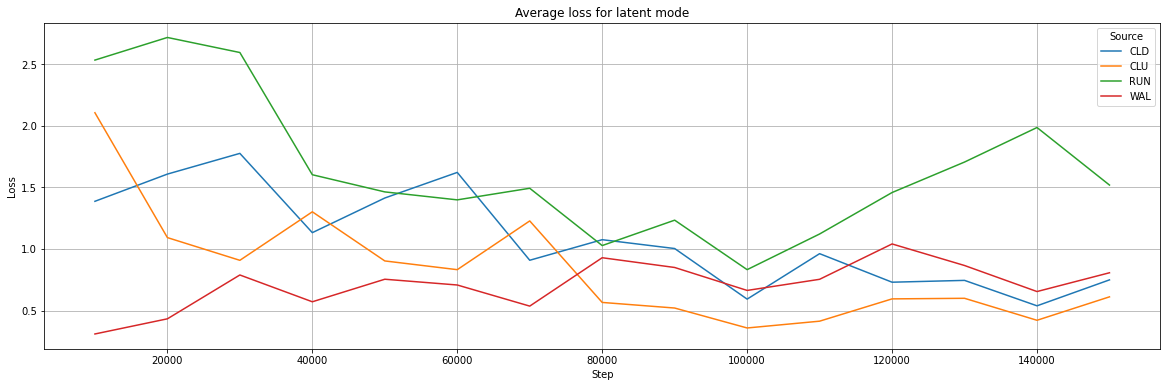

Minimum loss for CLD in reference mode: 0.3369 at step 110000
Minimum loss for CLU in reference mode: 0.2294 at step 120000
Minimum loss for RUN in reference mode: 0.7452 at step 100000
Minimum loss for WAL in reference mode: 0.1480 at step 130000


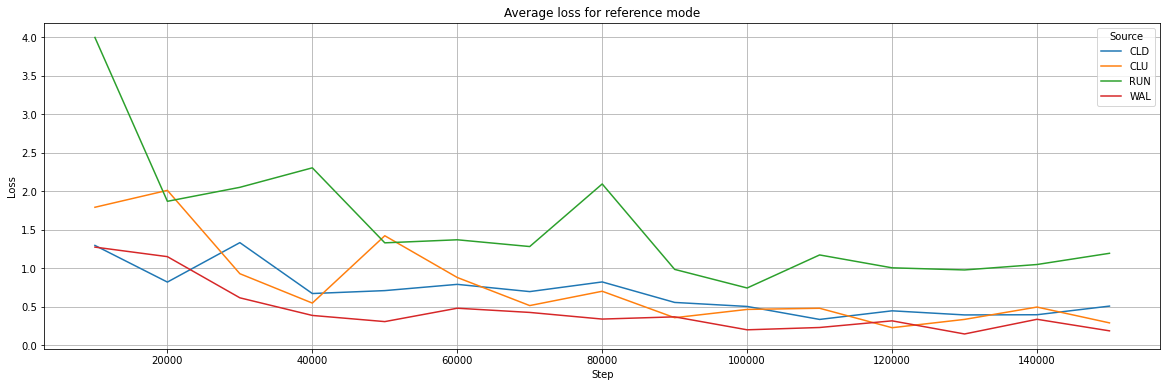

In [39]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for CLD: 0.8886 at step 140000
Maximum accuracy for CLU: 0.8953 at step 110000
Maximum accuracy for RUN: 0.7782 at step 100000
Maximum accuracy for WAL: 0.9151 at step 150000


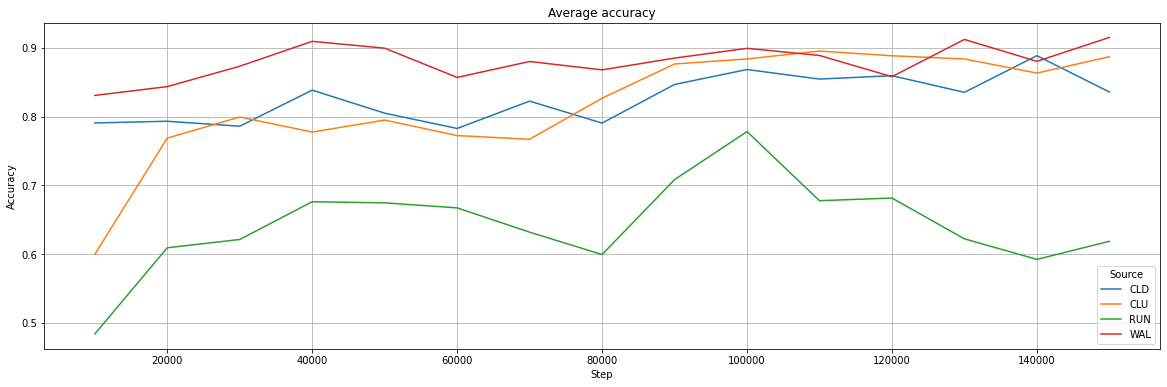

Minimum loss for CLD: 0.4680 at step 140000
Minimum loss for CLU: 0.4119 at step 120000
Minimum loss for RUN: 0.7884 at step 100000
Minimum loss for WAL: 0.4326 at step 100000


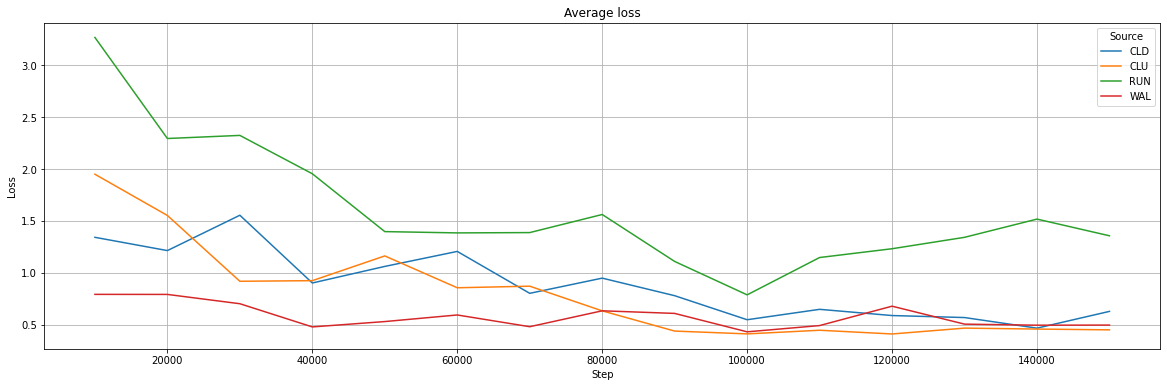

In [40]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.8557 at step 100000
Max in reference mode: 0.8752 at step 120000


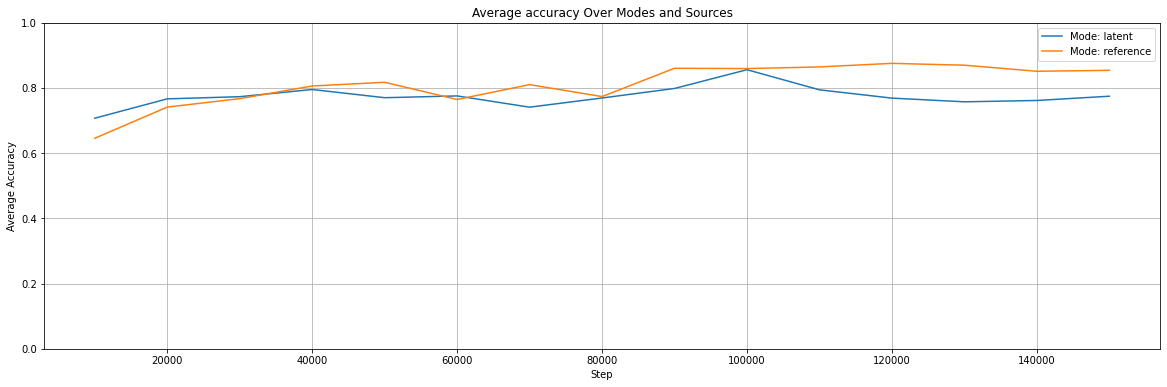

Min in latent mode: 0.6114 at step 100000
Min in reference mode: 0.4651 at step 130000


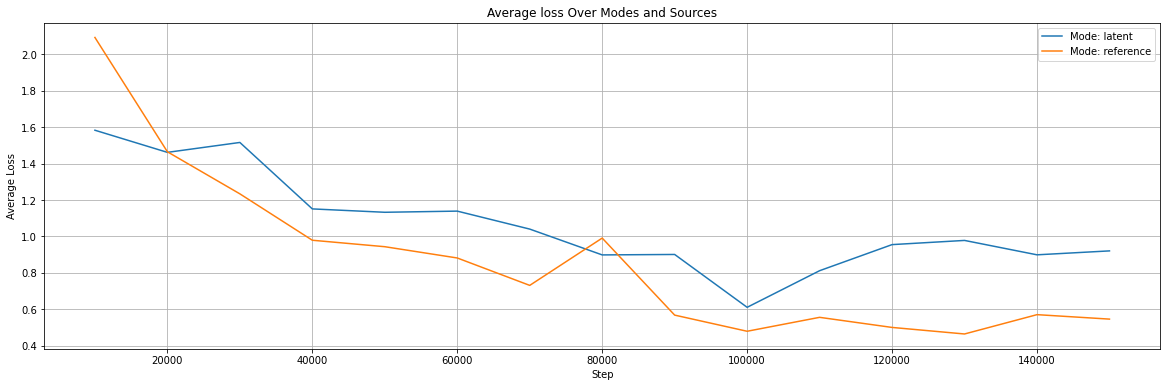

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        # # Find the maximum or minimum value of the metric before step 322000
        # max_before_322000 = mode_data[mode_data['step'] < 322000][metric].max()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
            # step_before_322000 = mode_data[mode_data[metric] == max_before_322000]['step'].values[0]
            # print(f'Max in {mode} mode before finetune: {max_before_322000:.4f} at step {step_before_322000}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

Max: 0.8574 at step 100000


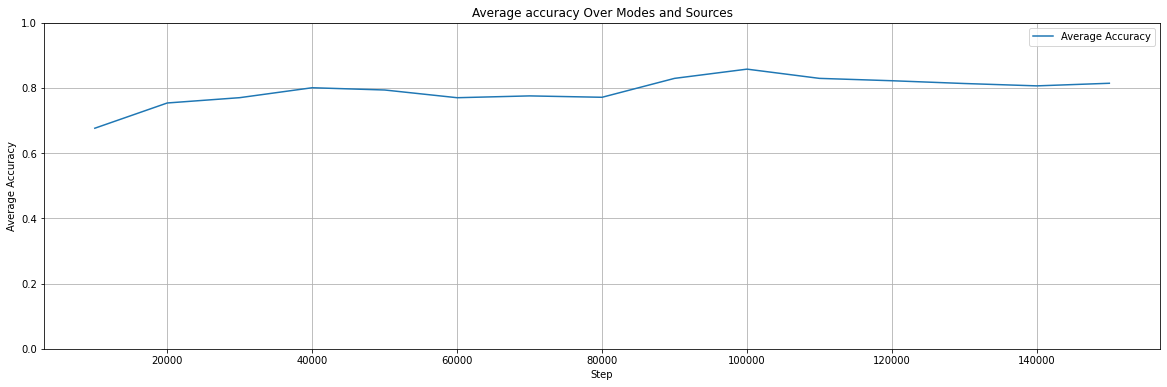

Min: 0.5457 at step 100000


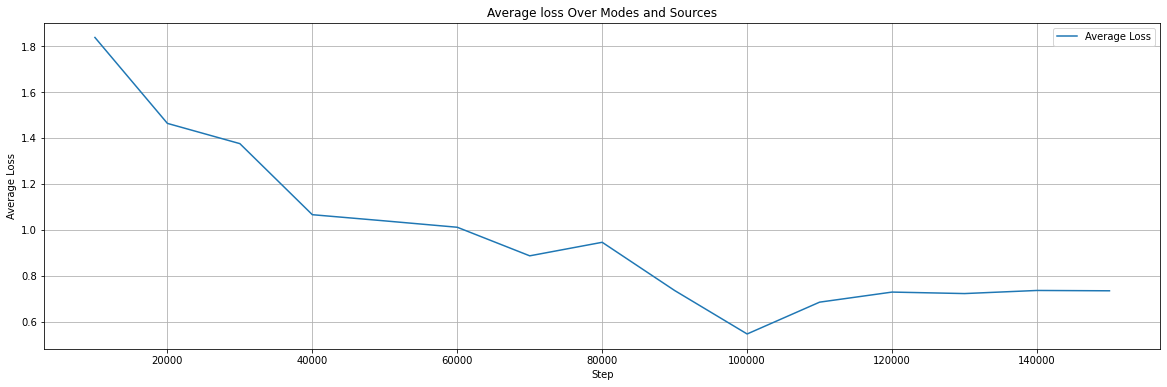

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label=f'Average {metric.capitalize()}')
    max_value = mean_data[metric].max()
    min_value = mean_data[metric].min()
    if metric == 'accuracy':
        step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Max: {max_value:.4f} at step {step}')
    else:
        step = mean_data[mean_data[metric] == min_value]['step'].values[0]
        print(f'Min: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

## Domain Score

In [43]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,10000,latent,WAL,RUN,0.420569,3.429890
1,10000,latent,WAL,CLD,0.360368,4.501217
2,10000,latent,WAL,CLU,0.467391,3.787149
3,10000,latent,RUN,WAL,0.117811,7.085638
4,10000,latent,RUN,CLD,0.257885,6.153018


Maximum accuracy in latent mode: 0.4078 at step 140000


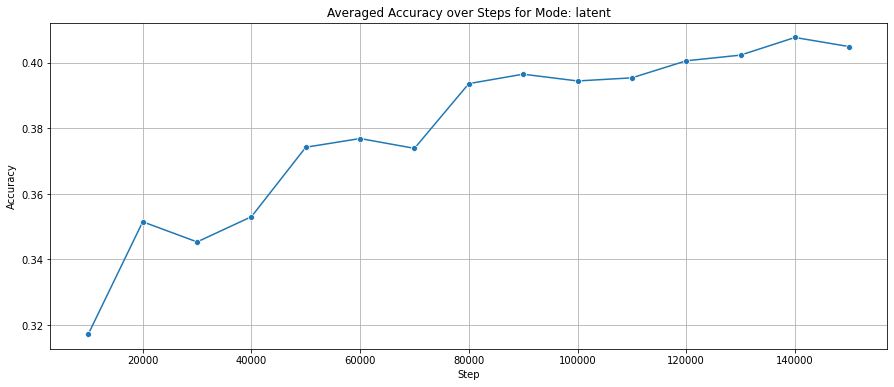

Maximum accuracy in reference mode: 0.3426 at step 140000


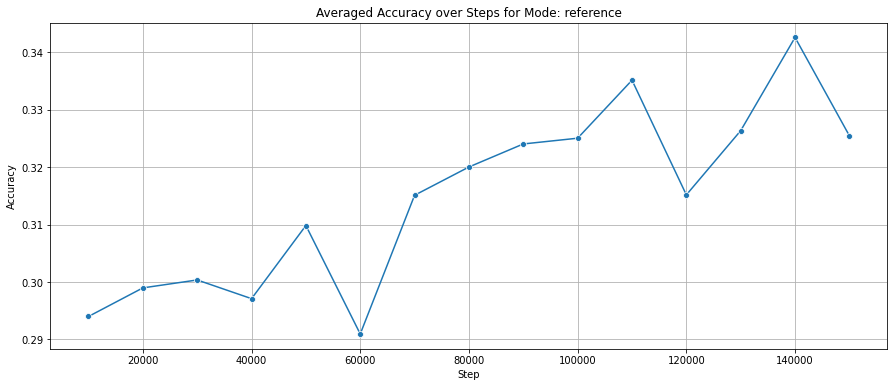

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')

Maximum accuracy in reference mode: 0.3752 at step 140000


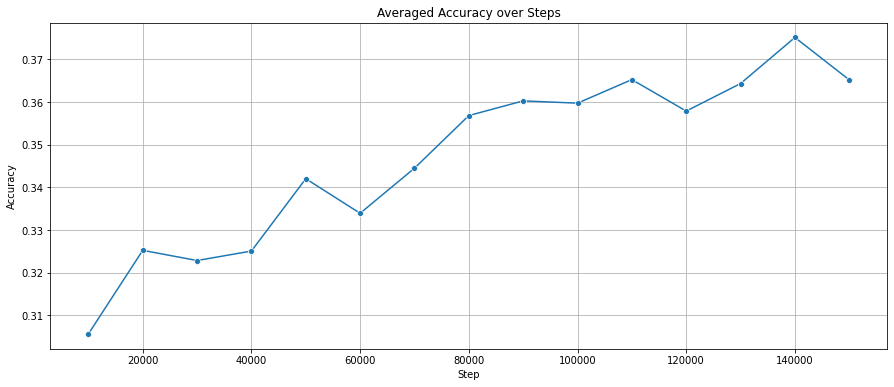

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, metric):
    
    # Group by step and calculate the mean of the metric
    averaged_data = data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



plot_metric_averaged(domain_scores, 'accuracy')

## Distance Score

In [46]:
distance_scores = pd.read_csv('eval/dist_scores.csv')
distance_scores.head()

,step,mode,source,target,domain,distance
0,10000,latent,WAL,RUN,0,1.082573
1,10000,latent,WAL,RUN,1,1.040126
2,10000,latent,WAL,RUN,2,0.177983
3,10000,latent,WAL,RUN,3,1.154418
4,10000,latent,WAL,RUN,4,0.789577


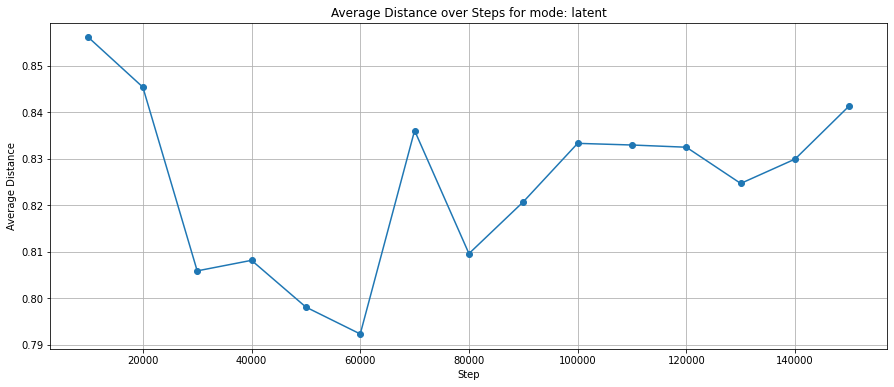

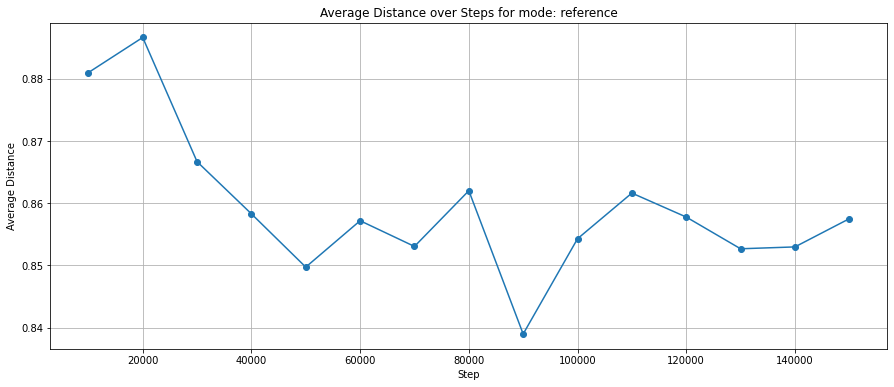

In [47]:
def plot_dist(data, mode):
    # Filter the dataframe by the given mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = filtered_data.groupby('step')['distance'].mean().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps for mode: {mode}')
    plt.grid(True)
    plt.show()

for mode in distance_scores['mode'].unique():
    plot_dist(distance_scores, mode)

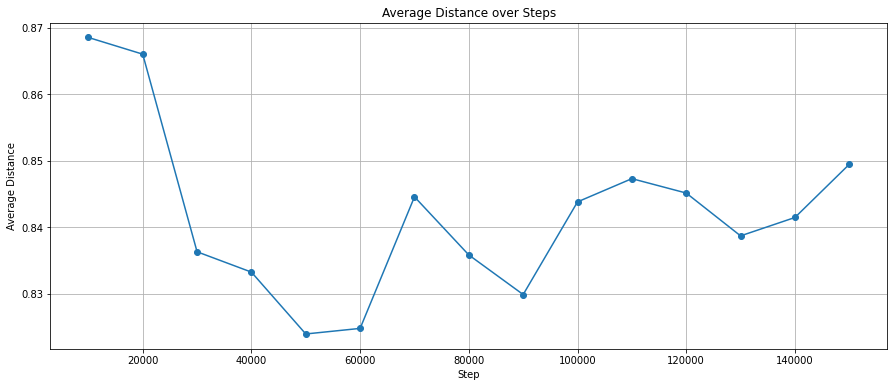

In [48]:
def plot_dist(data):
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = data.groupby('step')['distance'].mean().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps')
    plt.grid(True)
    plt.show()

plot_dist(distance_scores)